In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Data/dataset.csv')
df

,T2M,T2M_MAX,T2M_MIN,PRECTOTCORR,RH2M,WS50M,WS50M_MAX,WS50M_MIN,PM2.5
0,28.29,34.65,23.40,5.95,67.94,5.19,7.70,2.67,34.49
1,29.12,36.17,23.28,2.08,66.56,5.68,7.59,3.39,27.89
2,29.19,36.48,23.39,7.67,67.56,5.38,7.50,3.14,21.64
3,29.26,36.38,23.40,5.68,66.50,5.20,7.64,3.12,23.07
4,30.48,38.27,24.51,2.63,63.50,5.32,7.64,3.66,21.27
...,...,...,...,...,...,...,...,...,...
1390,30.02,37.79,24.98,0.05,65.62,6.88,8.09,4.95,23.73
1391,30.11,38.51,23.83,0.20,65.12,6.16,7.30,5.41,26.85
1392,30.38,38.89,24.24,0.12,64.62,6.84,8.64,5.44,19.72
1393,30.98,39.46,25.00,0.32,64.88,6.47,8.62,3.92,11.15


In [4]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

C:\Users\soumo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

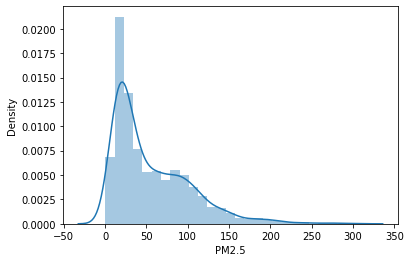

In [5]:
sns.distplot(y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
from sklearn.neighbors import KNeighborsRegressor

In [8]:
regressor=KNeighborsRegressor(n_neighbors=1)
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [9]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [10]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.5323395582346917


In [11]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [12]:
score.mean()

0.2289694178147296

In [13]:
prediction=regressor.predict(X_test)

C:\Users\soumo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

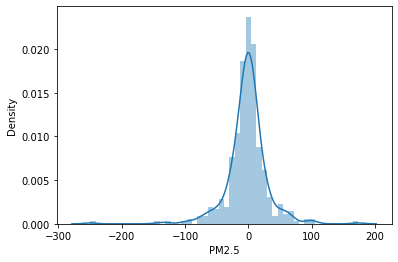

In [14]:
sns.distplot(y_test-prediction)

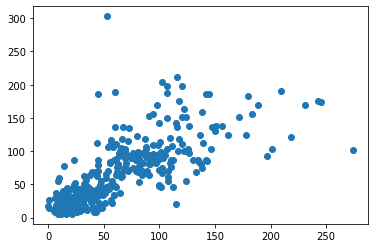

In [15]:
plt.scatter(y_test,prediction)

In [16]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

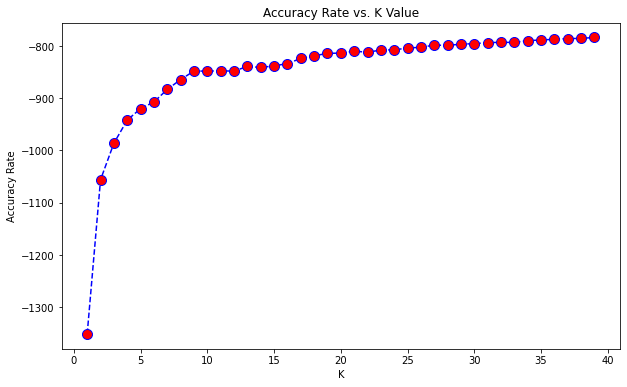

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [18]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsRegressor(n_neighbors=1)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

C:\Users\soumo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

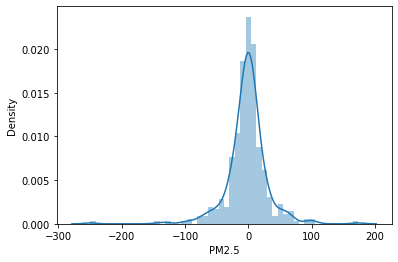

In [19]:
sns.distplot(y_test-predictions)

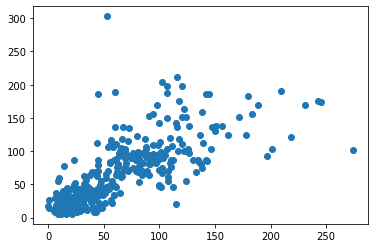

In [20]:
plt.scatter(y_test,predictions)

In [21]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 20.01140811455847
MSE: 1040.6011785202863
RMSE: 32.25835052386105


In [22]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

C:\Users\soumo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

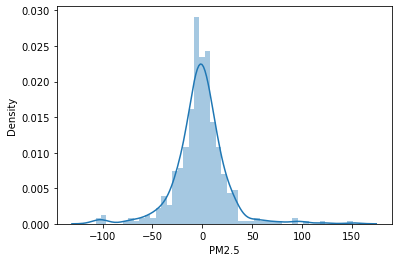

In [23]:
sns.distplot(y_test-predictions)

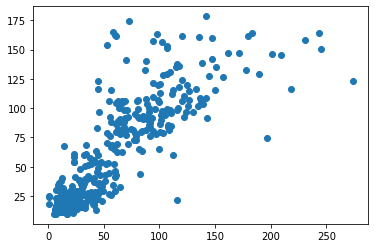

In [24]:
plt.scatter(y_test,predictions)

In [25]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 17.056022275258552
MSE: 700.9146722354812
RMSE: 26.474793148115083


In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 20.01140811455847
MSE: 1040.6011785202863
RMSE: 32.25835052386105
